<hr style="border:1px solid gray">

<a id="toc"></a>

## 1D plots - examples
created: **28/09/2023**; last edited: **13/10/2023**

[rafael.celestre@esrf.eu](mailto:rafael.celestre@esrf.eu)


Contents :
1. [Simple plot of a 1D data-set](#simple_1D_plot)
1. [Plot of several 1D data-sets](#several_1D_plot)
1. [Twin axis](#twin)

<hr style="border:1px solid gray">

In [1]:
# checking we are using the correct python:
import sys

print(sys.executable)
print(sys.version)

# %matplotlib notebook
%matplotlib inline
import matplotlib.pylab as pl
import numpy as np
import barc4plots.refactored_barc4plots as pt     

C:\Users\celestre\AppData\Local\miniconda3\envs\oasys\python.exe
3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]


<hr style="border:5px solid orange">

<a id="simple_1D_plot"></a>
### Plot of a 1D data-set:
[Back to the top](#toc)


<hr style="border:1px solid gray">
1.) This example we plot a simple curve and we enter each and all plot parameters by hand:

In [2]:
# Data for plotting
x = np.arange(0.0, 2.0, 0.01)
f_x = 1 + np.sin(2 * np.pi * x)

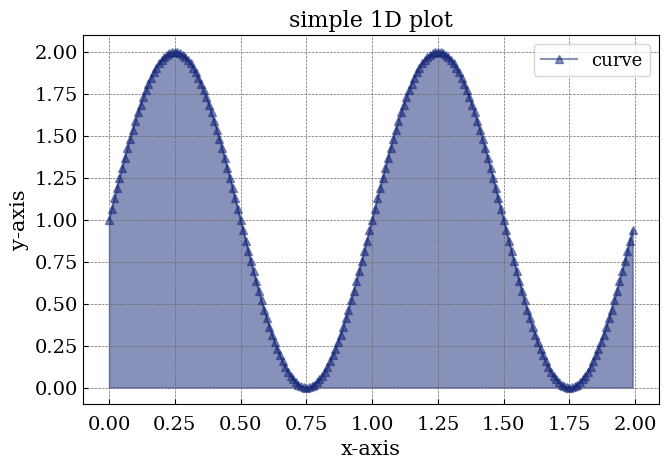

In [3]:
img = pt.Data4Plot()
# basic elements of the class
img.image = f_x
img.x = x
img.y = None
# additional info for plotting
img.AxLimits = [None, None, None, None]  # [xmin, xmax, ymin, ymax]
img.AxLegends = ['simple 1D plot', 'x-axis', 'y-axis'] 
# aesthetics
img.dpi = 400
img.LaTex = True
img.AspectRatio = True
img.ColorScheme = 2
img.PlotScale = 0
img.FontsSize = 1
img.grid = True
img.nbins = 4
# 1D plots
img.Label = 'curve'
img.LabelPos = 1
img.LineStyle = '-^'
img.FillBetween = True
img.FillBetweenValue = 0
img.alpha = 0.5
img.plot_1d()

<hr style="border:1px solid gray">
2.) The graph above can be also generate in a much more compact way:

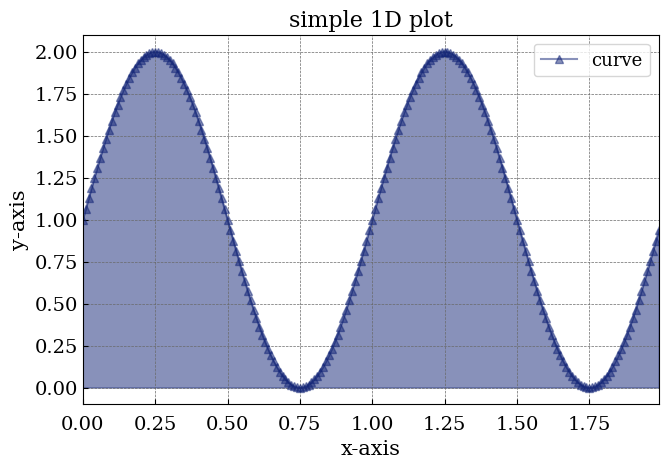

In [4]:
img = pt.Data4Plot(f_x, x)
img.additional_info('simple 1D plot', 'x-axis', 'y-axis')
img.aesthetics(400, True, True, 0 , 1, True, 4)
img.info_1d_plot(2,'curve', 1, '-^', True, 0, 0.5)
img.plot_1d()

<hr style="border:5px solid orange">

<a id="several_1D_plot"></a>
### Plot of a several 1D data-sets:
[Back to the top](#toc)


<hr style="border:1px solid gray">
3.) Several plots can be added to the same figure:

In [5]:
# Data for plotting
x = np.arange(0.0, 2.0, 0.01)
s1 = 1 + np.sin(2 * np.pi * x)
s2 = 1 + np.sin(2 * np.pi * x * np.sqrt(2))
s3 = 1 + np.sin(2 * np.pi * x * 2)

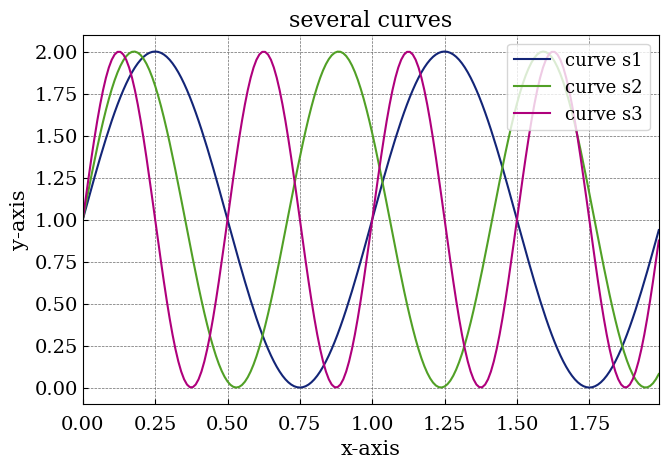

In [6]:
img = pt.Data4Plot(f_x, x)
img.additional_info('several curves', 'x-axis', 'y-axis')
img.aesthetics(400, True, True, 0 , 1, True, 2)
img.info_1d_plot(2,'curve s1', 1, '-', False, 0, 1)
img.plot_1d(enable=False, hold=False)

img.image = s2
img.info_1d_plot(3,'curve s2', 1, '-', False, 0, 1)
img.plot_1d(enable=False, hold=True)

img.image = s3
img.info_1d_plot(4,'curve s3', 1, '-', False, 0, 1)
img.plot_1d(enable=True, hold=True)


<hr style="border:1px solid gray">
4.) If there are many graphs to be overlayed, it is helpful to use the following construction:

In [7]:
# Data for plotting

n_graphs = 10
colors = pl.cm.viridis_r(np.linspace(0, 1, n_graphs))

x = np.arange(0.0, 2, 0.005)

signals = np.zeros([n_graphs, len(x)])

for i in range(n_graphs):
    signals[i,:] = 1 + np.sin(2 * np.pi * x / ((1+i/5)))

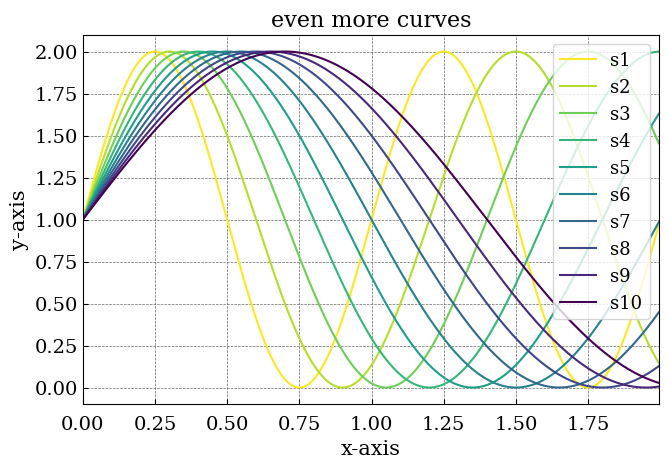

In [8]:
for i in range(n_graphs):
    img = pt.Data4Plot(signals[i,:], x)
    img.additional_info('even more curves', 'x-axis', 'y-axis')
    img.aesthetics(400, True, True, 0 , 1, True, 2)
    img.info_1d_plot(colors[i],'s%s'%(i+1), 1, '-', False, 0, 1)
    if i == 0:
        img.plot_1d(enable=False, hold=False)
    elif i == n_graphs-1:
        img.plot_1d(enable=True, hold=True)
    else:
        img.plot_1d(enable=False, hold=True)


<hr style="border:5px solid orange">

<a id="twin"></a>
### Twin axis:
[Back to the top](#toc)
